In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

Подробное описание алгоритма K-средних (SSE, контурный анализ)
https://russianblogs.com/article/2842851849/

### 1. Алгоритм K-средних
Среди алгоритмов кластеризации алгоритм K-средних является наиболее популярным и широко используемым алгоритмом кластеризации из-за его простой реализации и высокой вычислительной эффективности. Области применения алгоритмов кластеризации также очень обширны, включая различные типы классификации документов, музыку, фильмы, классификацию, основанную на покупательском поведении пользователя, и построение систем рекомендаций на основе интересов пользователей.

Этапы реализации алгоритма K-Means в основном делятся на четыре этапа:

1. Произвольно выберите k точек выборки из набора выборок в качестве центра начального кластера.

2. Разделите каждую точку выборки на кластер, представленный ближайшей центральной точкой.

3. Используйте центральную точку всех точек выборки в каждом кластере, чтобы представить центральную точку кластера.

4. Повторяйте шаги 2 и 3, пока центральная точка кластера не останется неизменной или не достигнет установленного количества итераций или не достигнет установленного диапазона допуска.

Обычно используемая метрика расстояния - это квадрат евклидова расстояния:
Где x и y представляют две разные выборки, а n представляет размер выборки (количество функций). Основываясь на евклидовом расстоянии, проблема, которую необходимо оптимизировать алгоритму K-средних, состоит в том, чтобы минимизировать внутрикластерную сумму квадратов ошибок (SSE), которая также называется межкластерными интертиями (межкластерными интертиями).

Используем sklearn для реализации приложения алгоритма k-средних, используя набор данных sklearn, набор данных содержит 150 случайно сгенерированных точек, а точки выборки разделены на три разных кластера.

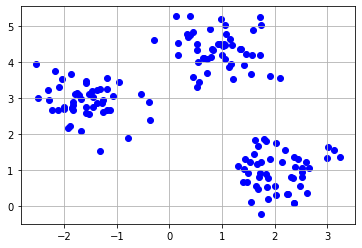

In [8]:
if __name__ == "__main__":
    '''
    n_samples: представляет количество точек выборки
         n_features: указывает, что каждый образец состоит из двух функций
         center: указывает количество центров точек выборки (кластеров)
         cluster_std: указывает размер дисперсии каждого кластера выборки
    '''
    x,y = make_blobs(n_samples=150,n_features=2,centers=3,
                     cluster_std=0.5,shuffle=True,random_state=0)
         #    
    plt.scatter(x[:,0],x[:,1],marker="o",color="blue")
         # Отображение в виде таблицы
    plt.grid()
    plt.show()

Распределение 150 точек выборки показано на рисунке выше. Далее используется встроенный алгоритм KMeans sklearn для реализации кластерного анализа указанных выше точек выборки.

In [3]:
'''
    n_clusters: установить количество кластеров
    init: random означает использование алгоритма Kmeans, по умолчанию k-means ++
    n_init: установить количество центров начальной выборки
    max_iter: установить максимальное количество итераций
    tol: Установить диапазон допустимости ошибок алгоритма SSE (квадратичная ошибка внутрикластерной ошибки)
'''
kmeans = KMeans(n_clusters=3,init="random",n_init=10,max_iter=300,
                    tol=1e-04,random_state=0)
y_km = kmeans.fit_predict(x)

### 2. К-средние ++
Алгоритм K-средних должен случайным образом выбирать центральную точку инициализации. Если центральная точка выбрана неправильно, это может вызвать такие проблемы, как слабый эффект кластера или медленная скорость сходимости. Более подходящий способ решить эту проблему - выполнить алгоритм K-средних несколько раз для набора данных и выбрать наиболее эффективную модель на основе суммы квадратов ошибок в кластере (SSE). Кроме того, можно использовать алгоритм K-Means ++, чтобы сделать начальные центральные точки как можно дальше друг от друга. По сравнению с алгоритмом K-Means он может создать лучшую модель.

K-Means ++ состоит из следующих шагов:

1. Инициализируйте пустой набор M для хранения выбранных k центральных точек.

2. Случайным образом выберите первую центральную точку μ из входной выборки и добавьте ее в набор M

3. Для любой точки выборки x за пределами набора M найдите образец с наименьшим расстоянием d (x, M) путем вычисления.

4. Используйте взвешенное распределение вероятностей, чтобы случайным образом выбрать следующую центральную точку μ.

5. Повторяйте шаги 2 и 3, пока не будут выбраны k центральных точек.

6. Выполните алгоритм k-средних на основе выбранной центральной точки.

Чтобы использовать sklearn для реализации K-Means ++, вам нужно всего лишь установить для параметра init значение «k-means ++», а значение по умолчанию - «k-means ++». Давайте использовать алгоритм k-means ++ для реализации кластеризации трех вышеуказанных кластеров.

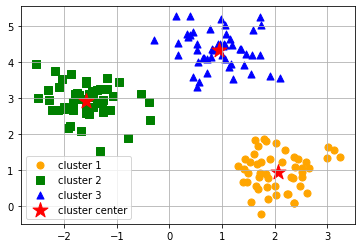

In [12]:
km = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300,
                tol=1e-04,random_state=0)
         #y_km сохраненные результаты кластеризации
y_km = km.fit_predict(x)
         # Отрисовка точек разных кластеров
plt.scatter(x[y_km==0,0],x[y_km==0,1],s=50,c="orange",marker="o",label="cluster 1")
plt.scatter(x[y_km==1,0],x[y_km==1,1],s=50,c="green",marker="s",label="cluster 2")
plt.scatter(x[y_km==2,0],x[y_km==2,1],s=50,c="blue",marker="^",label="cluster 3")
         # Нарисуйте центральную точку кластера
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker="*",c="red",label="cluster center")
plt.legend()
plt.grid()
plt.show()

Из рисунка выше видно, что эффект кластеризации k-средних ++ неплох: центральная точка кластера в основном находится в центре сферы. В реальных ситуациях может возникнуть ситуация с использованием алгоритма k-means ++, поскольку размерность образца слишком велика для визуализации, количество кластеров образца не может быть установлено. Кластеры алгоритма k-средних не могут перекрываться или расслаиваться, и предполагается, что по крайней мере один образец появится в каждом кластере.

Примечание. Поскольку алгоритм k-средних вычисляется на основе евклидова расстояния, алгоритм k-средних более чувствителен к диапазону данных. Поэтому перед использованием алгоритма k-средних необходимо стандартизировать данные, чтобы гарантировать, что алгоритм k-средних не Влияние характерного размера.

### 3. Жесткая кластеризация и мягкая кластеризация
Жесткая кластеризация означает, что образцы в наборе данных могут быть разделены только на один кластер, например, алгоритм k-средних. Мягкая кластеризация (мягкая кластеризация) или нечеткая кластеризация (нечеткая кластеризация) могут разделить выборку на несколько разных кластеров, например алгоритм C-средних (FCM).

Шаги вычисления FCM аналогичны шагам для k-средних, за исключением того, что FCM использует вероятность выборок, принадлежащих разным кластерам, вместо меток классов в k-средних. Сумма вероятностей принадлежности выборки к разным кластерам равна 1.

Шаги расчета FCM следующие:

1. Укажите k центральных точек и случайным образом разделите каждую точку выборки на определенный кластер.

2. Вычислите центр μ каждого кластера.

3. Обновите вероятность (степень принадлежности) кластера, которому принадлежит каждая точка выборки.

4. Повторяйте шаги 2 и 3 до тех пор, пока вероятность кластера, которому принадлежит точка выборки, не останется неизменной или не достигнет диапазона отказоустойчивости или максимального количества итераций.

Стоимость вычисления одной итерации алгоритма FCM выше, чем у алгоритма k-средних, но скорость сходимости FCM выше.

### 4. Показатели эффективности алгоритма кластеризации.
#### 1) Дисперсия ошибок в кластере (SSE)
При разделении кластеров мы используем SSE в качестве целевой функции для разделения кластеров. Когда обучение алгоритма KMeans завершено, мы можем использовать атрибут инерции для получения дисперсии ошибки в кластере без необходимости повторного выполнения вычислений.

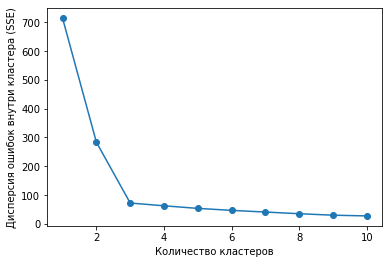

In [5]:
# Используется для хранения значения SSE при установке разных номеров кластеров
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init="k-means++",n_init=10,max_iter=300,tol=1e-4,random_state=0)
    km.fit(x)
      # Получить SSE алгоритма K-средних
    distortions.append(km.inertia_)
      # Нарисуйте кривую
plt.plot(range(1,11),distortions,marker="o")
plt.xlabel('Количество кластеров')
plt.ylabel('Дисперсия ошибок внутри кластера (SSE)')
plt.show()

Вы можете использовать метод изгиба графического инструмента, чтобы визуализировать дисперсию ошибок в кластере в соответствии с количеством кластеров. На графике можно интуитивно наблюдать влияние k на дисперсию ошибок в кластере.

Из приведенного выше рисунка видно, что когда количество кластеров равно 3, появляется форма колена, которая показывает, что k, взяв 3, является хорошим выбором.

#### 2) Количественный анализ качества кластеризации по контурной карте.
Силуэтный анализ, который использует графические инструменты для измерения степени кластеризации выборок в кластере, также применим к другим алгоритмам кластеризации, помимо k-средних. Коэффициент силуэта образца можно рассчитать в три этапа:

1. Среднее расстояние между образцом x и другими точками в кластере принимается за сцепление в кластере a
2. Среднее расстояние между образцом x и всеми точками в ближайшем кластере рассматривается как степень отделения b от ближайшего кластера.
3. Разделите разницу между степенью разделения кластеров и степенью сцепления кластеров на большее из двух значений, чтобы получить коэффициент контура.

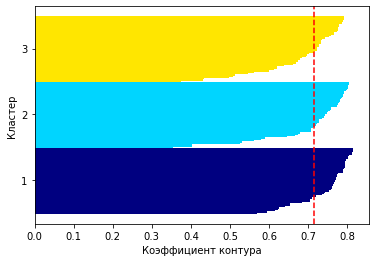

In [6]:
km = KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300,tol=1e-4,random_state=0)
y_km = km.fit_predict(x)

         # Получить метку кластера
cluster_labels = np.unique(y_km)
         # Получить количество кластеров
n_clusters = cluster_labels.shape[0]
         # Рассчитать коэффициент контура на основе евклидова расстояния
silhoutte_vals = silhouette_samples(x,y_km,metric="euclidean")
         # Установить начальное положение координаты y
y_ax_lower,y_ax_upper=0,0
yticks=[]
for i,c in enumerate(cluster_labels):
                 # Получить коэффициенты контура различных кластеров
    c_silhouette_vals = silhoutte_vals[y_km == c]
                 # Сортировать контурные коэффициенты образцов в кластере от маленького к большому
    c_silhouette_vals.sort()
                 # Получить количество контурных коэффициентов в кластере
    y_ax_upper += len(c_silhouette_vals)
                 # Получить разные цвета
    color = cm.jet(i / n_clusters)
                 # Нарисуйте горизонтальную гистограмму
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals, height=1.0,edgecolor="none",color=color)
                 # Получить положение шкалы оси Y
    yticks.append((y_ax_lower+y_ax_upper) / 2)
                     # Начальная позиция следующей оси Y
    y_ax_lower += len(c_silhouette_vals)
         # Получить среднее значение коэффициента контура
silhouette_avg = np.mean(silhoutte_vals)
         # Нарисуйте пунктирную линию параллельно среднему значению коэффициента контура оси Y
plt.axvline(silhouette_avg,color="red",linestyle="--")
         # Установить масштаб, отображаемый по оси Y
plt.yticks(yticks,cluster_labels+1)
plt.ylabel ('Кластер')
plt.xlabel ('Коэффициент контура')
plt.show()

Значение коэффициента профиля составляет от -1 до 1. Когда сцепление кластера равно расстоянию деления, коэффициент контура равен 0. Когда b >> a, коэффициент профиля примерно равен 1, и производительность модели является наилучшей.

С помощью контурной карты мы можем увидеть количество кластеров в выборке и определить, содержит ли выборка выбросы. Чтобы оценить производительность модели кластеризации, ее можно оценить, оценив коэффициент контура, который показан красной пунктирной линией на рисунке.